<a href="https://colab.research.google.com/github/ecordeiro/data_science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

https://www.kaggle.com/c/titanic/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns

In [ ]:
# configurações para os prints
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

para ver a pasta compartilhada dentro de "myDrive": vá ate a pasta compartilhada Kaggle-Titanic, clique com o botão direito e selecione "criar atalho ao Google Drive". Selecione a pasta "MyDrive". Com o atalho as linhas abaixo funcionarão.

In [ ]:
!ls '/content/drive/MyDrive/Kaggle-Titanic/dados'

gender_submission.csv  test.csv  train.csv  unidos.csv


In [ ]:
#nome_do_arquivo="/content/drive/MyDrive/Colab Notebooks/Files/train.csv"
nome_do_arquivo="/content/drive/MyDrive/Kaggle-Titanic/dados/train.csv"
dataframe_envio_portos = pd.read_csv(nome_do_arquivo)

# Definição do problema

Problema: Construir um modelo preditivo cujo objetivo seja responder: **Qual tipo de passageiro ou pessoa tem mais probabilidade de sobreviver?**

- Total de Passageiros: 2224
- Total de mortos: 1502 - 68%
- Total de sobreviventes: 722 - 32%

# **DataSets**

- Train dataset: contem detalhes de uma amostra dos passeiros a bordo. Neste dataset também temos a informção se as pessoas sobreviveram o não ao acidente. Essa informação, iremos utilizar como target.
- test dataset: contem informações similares de outro grupo de passageiros, mas não contem a informação target. Esse é o objetivo do modelo preditivo.
- O arquivo gender_submission, é um exemplo de como teremos que postar o arquivo. Ele deverá seguir exatamente o mesmo formato.


# Features
| Coluna | Descrição | Observação |
|:---------:|:-----------:|:-----------:|
|0 - **PassengerId**| id do passageiro. Podemos excluir do modelo.| Será necessário para submeter o arquivo no kaggel|
|1 - **Survived**| Atributo numérico (0 - Morreu,1 - Sobreviveu).| Percebi um certo debalanceamento. Talvez seja necessário rebalancear.|
|2 - **Pclass**| Atributo numérico. (1 - Classe alta, 2 - Classe media, 3 - Classe baixa)| |
|3 - **Name**| Nome |não é relevante para o modelo. Podemos excluir.|
|4 - **Sex**| |Está como categórico. Podemos transformar em 0 e 1. (dummies)|
|5 - **age**| Idade |Abaixo de 1, está fracionada. Verificar se iremos deixar como está ou se iremos normalizar.|
|6 - **SibSp**| Define o número de irmãos e conjuges. |Está com dados 0 a 8. Discutir também se iremos normalizar|
|7 - **parch**| Quantidade de Pais/Mães a bordo. |Está com dados de 0 a 6. Discutir também se iremos normalizar|
|8 - **ticket**|número de ticket|Valores alfa. Entendo que todos da mesma familia estão com o mesmo número de ticket.|
|9 - **Passenger fare**| Valores float. Valor da taxa paga por cada passageiro. |Entendo que poderemos encontrar uma multicolinearidade com Pclass aqui. Importante analisar matriz de correlação.|
|10 - **cabin** | Cabine |**OBS:** no arquivo de teste, existe a coluna cabin. Como não entrará no modelo, entendo que teremos que excluíla na hora de aplicar no modelo.|
|11 - **embarked**|Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)|






- Age: provavelmente excluir ou excluir nulos
- Cabin: excluir
- Name: provavelmente excluir. Verificar sobrenome
- Ticket: excluir
- Embarked: excluir nulos

# Análise Exploratória

In [ ]:
dataframe_envio_portos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [ ]:
print(dataframe_envio_portos.shape)
# Verificando quantos nulos e quais os tipos de cada coluna
print(pd.DataFrame({'Qtd.NaN':dataframe_envio_portos.isna().sum(), 'Tipo':dataframe_envio_portos.dtypes}))

(891, 12)
             Qtd.NaN     Tipo
PassengerId        0    int64
Survived           0    int64
Pclass             0    int64
Name               0   object
Sex                0   object
Age              177  float64
SibSp              0    int64
Parch              0    int64
Ticket             0   object
Fare               0  float64
Cabin            687   object
Embarked           2   object


In [ ]:
dataframe_envio_portos.Embarked.fillna('S',inplace=True)

In [ ]:
dataframe_envio_portos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Transformação de dados

In [ ]:
dataframe_envio_portos.drop(["Cabin","Name","Ticket","PassengerId"], axis = 1, inplace=True)

In [ ]:
dataframe_envio_portos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S
1,1,1,female,38.0,1,0,71.28,C
2,1,3,female,26.0,0,0,7.92,S
3,1,1,female,35.0,1,0,53.10,S
4,0,3,male,35.0,0,0,8.05,S


In [ ]:
condicao = (dataframe_envio_portos.Pclass == 1) & (dataframe_envio_portos.Age.isna())
dataframe_envio_portos.loc[condicao,'Age'] = 37
condicao = (dataframe_envio_portos.Pclass == 2) & (dataframe_envio_portos.Age.isna())
dataframe_envio_portos.loc[condicao,'Age'] = 29
condicao = (dataframe_envio_portos.Pclass == 3) & (dataframe_envio_portos.Age.isna())
dataframe_envio_portos.loc[condicao,'Age'] = 24

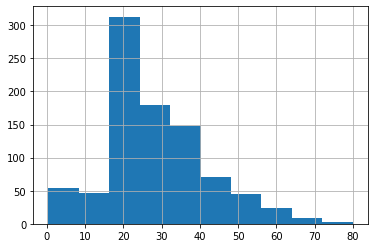

In [ ]:
dataframe_envio_portos.Age.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


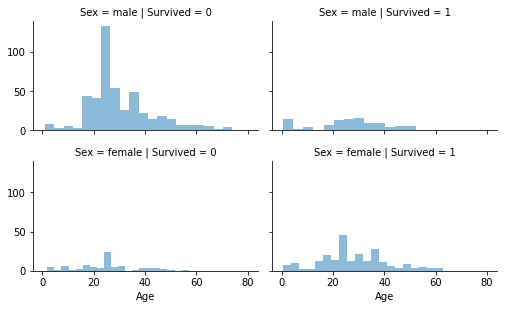

In [ ]:
grid = sns.FacetGrid(dataframe_envio_portos, col='Survived',row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
#Creating a featrure AgeBins from Age range
#here values 1, 2, 3, 4, 5 represent Seniors, Adults, Middle Aged, Teens, Young and Childrens.
conditions = [
    (dataframe_envio_portos['Age'] > 0) & (dataframe_envio_portos['Age'] <= 8),
    (dataframe_envio_portos['Age'] > 8) & (dataframe_envio_portos['Age'] <= 18),
    (dataframe_envio_portos['Age'] > 18) & (dataframe_envio_portos['Age'] <= 25),
    (dataframe_envio_portos['Age'] > 25) & (dataframe_envio_portos['Age'] <= 32),
    (dataframe_envio_portos['Age'] > 32) & (dataframe_envio_portos['Age'] <= 40),
    (dataframe_envio_portos['Age'] > 40) & (dataframe_envio_portos['Age'] <= 50),
    (dataframe_envio_portos['Age'] > 50) & (dataframe_envio_portos['Age'] <= 60),
    (dataframe_envio_portos['Age'] > 60)
    ]

values = [0, 1, 2, 3, 4, 5, 6, 7]

dataframe_envio_portos['AgeBins'] = np.select(conditions, values)

In [ ]:
dataframe_envio_portos.drop('Age',inplace=True, axis=1)

In [ ]:
AgeBins_dummies = pd.get_dummies(dataframe_envio_portos['AgeBins'], 
                                       prefix='AgeBins', 
                                       prefix_sep='_', 
                                       dummy_na=False, 
                                       columns=None, 
                                       sparse=False, 
                                       drop_first=False, 
                                       dtype=None)

In [ ]:
dataframe_envio_portos = pd.concat([dataframe_envio_portos, AgeBins_dummies], axis = 1)
dataframe_envio_portos.drop(["AgeBins"], axis = 1, inplace=True)

In [ ]:
dataframe_envio_portos.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7
0,0,3,male,1,0,7.25,S,0,0,1,0,0,0,0,0
1,1,1,female,1,0,71.28,C,0,0,0,0,1,0,0,0
2,1,3,female,0,0,7.92,S,0,0,0,1,0,0,0,0
3,1,1,female,1,0,53.10,S,0,0,0,0,1,0,0,0
4,0,3,male,0,0,8.05,S,0,0,0,0,1,0,0,0


In [ ]:
dataframe_envio_portos.pivot_table('Survived',index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.97,0.92,0.50
male,0.37,0.16,0.14


In [ ]:
#dataframe_envio_portos.pivot_table('Survived',index='AgeBins', columns='Pclass')

In [ ]:
#dataframe_envio_portos.groupby('Pclass', as_index=False).agg({'Age': ['count','mean','median']})

In [ ]:
dataframe_envio_portos.shape

(891, 15)

In [ ]:
dataframe_envio_portos.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7
0,0,3,male,1,0,7.25,S,0,0,1,0,0,0,0,0
1,1,1,female,1,0,71.28,C,0,0,0,0,1,0,0,0
2,1,3,female,0,0,7.92,S,0,0,0,1,0,0,0,0
3,1,1,female,1,0,53.10,S,0,0,0,0,1,0,0,0
4,0,3,male,0,0,8.05,S,0,0,0,0,1,0,0,0


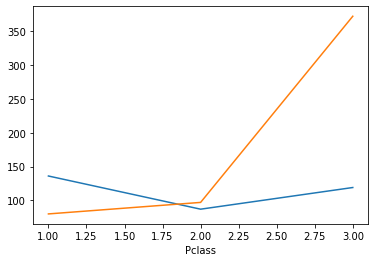

In [ ]:
sobreviveu = (dataframe_envio_portos.Survived==1) 
morreu = dataframe_envio_portos.Survived==0

dataframe_envio_portos[sobreviveu].groupby(by=["Pclass"], dropna=False)["Survived"].count().plot(),
dataframe_envio_portos[morreu].groupby(by=["Pclass"], dropna=False)["Survived"].count().plot()

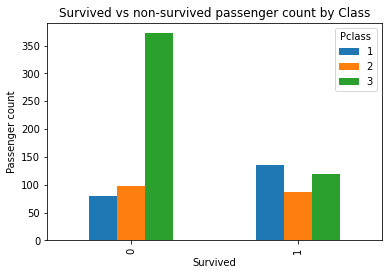

In [ ]:
ax = pd.crosstab(dataframe_envio_portos['Survived'], dataframe_envio_portos['Pclass']).plot(kind='bar')
ax.set_ylabel('Passenger count')
_ = ax.set_title('Survived vs non-survived passenger count by Class')

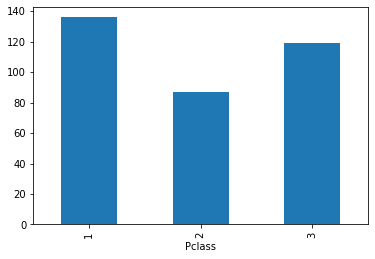

In [ ]:
dataframe_envio_portos[sobreviveu].groupby(by=["Pclass"], dropna=False)["Survived"].count().plot(kind='bar')


In [ ]:
Pclass_dummies = pd.get_dummies(dataframe_envio_portos['Pclass'], 
                                       prefix='Pclass', 
                                       prefix_sep='_', 
                                       dummy_na=False, 
                                       columns=None, 
                                       sparse=False, 
                                       drop_first=False, 
                                       dtype=None)

In [ ]:
Pclass_dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
df_train = pd.concat([dataframe_envio_portos, Pclass_dummies], axis = 1)
df_train.drop(["Pclass"], axis = 1, inplace=True)


In [ ]:
df_train.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,0,male,1,0,7.25,S,0,0,1,0,0,0,0,0,0,0,1
1,1,female,1,0,71.28,C,0,0,0,0,1,0,0,0,1,0,0
2,1,female,0,0,7.92,S,0,0,0,1,0,0,0,0,0,0,1
3,1,female,1,0,53.10,S,0,0,0,0,1,0,0,0,1,0,0
4,0,male,0,0,8.05,S,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_train['Sex'].replace('male', 0, inplace = True)
df_train['Sex'].replace('female', 1, inplace = True) 

df_train.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,7.25,S,0,0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,71.28,C,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,7.92,S,0,0,0,1,0,0,0,0,0,0,1
3,1,1,1,0,53.10,S,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,8.05,S,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
df_train['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

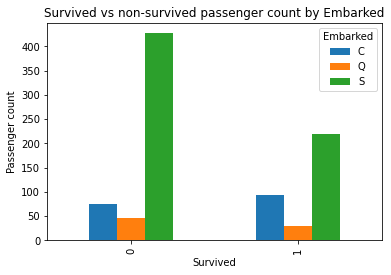

In [ ]:
ax = pd.crosstab(df_train['Survived'], df_train['Embarked']).plot(kind='bar')
ax.set_ylabel('Passenger count')
_ = ax.set_title('Survived vs non-survived passenger count by Embarked')

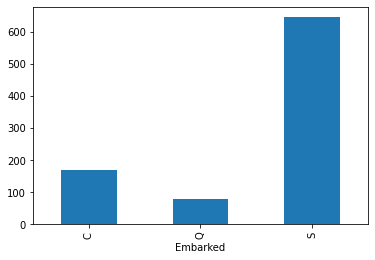

In [ ]:
df_train.groupby(by=["Embarked"], dropna=False)["Survived"].count().plot(kind='bar')

In [ ]:
df_train['Embarked'].replace('Q', 0, inplace = True)
df_train['Embarked'].replace('C', 1, inplace = True) 
df_train['Embarked'].replace('S', 2, inplace = True) 


In [ ]:
df_train.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,7.25,2,0,0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,71.28,1,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,7.92,2,0,0,0,1,0,0,0,0,0,0,1
3,1,1,1,0,53.10,2,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,8.05,2,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_train.columns

Index(['Survived', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeBins_0',
       'AgeBins_1', 'AgeBins_2', 'AgeBins_3', 'AgeBins_4', 'AgeBins_5',
       'AgeBins_6', 'AgeBins_7', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

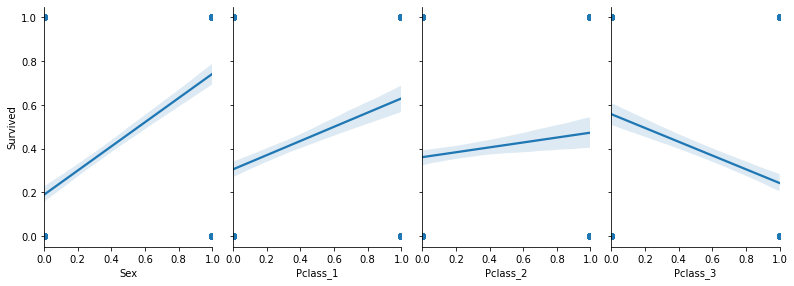

In [ ]:
sns.pairplot(df_train, x_vars=['Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3'], 
             y_vars='Survived', height=4, aspect=0.7, kind='reg');

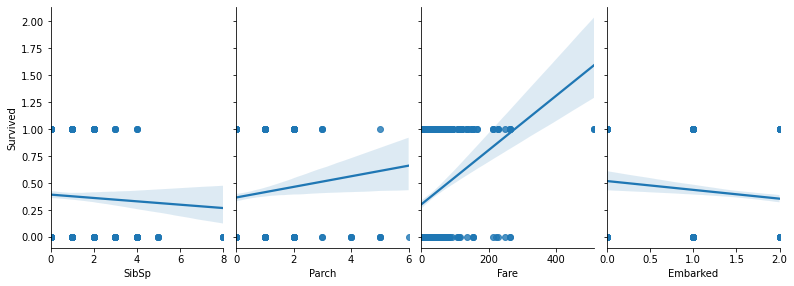

In [ ]:
sns.pairplot(df_train, x_vars=['SibSp', 'Parch', 'Fare', 'Embarked'], 
             y_vars='Survived', height=4, aspect=0.7, kind='reg');

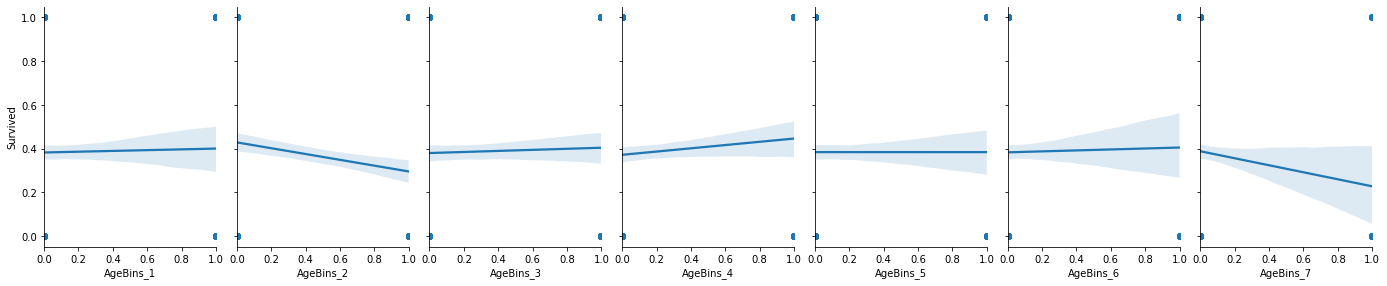

In [ ]:
sns.pairplot(df_train, x_vars=['AgeBins_1', 'AgeBins_2', 'AgeBins_3', 'AgeBins_4', 'AgeBins_5',
       'AgeBins_6', 'AgeBins_7'], 
             y_vars='Survived', height=4, aspect=0.7, kind='reg');

In [ ]:
df_train.isnull().sum()

Survived     0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     0
AgeBins_0    0
AgeBins_1    0
AgeBins_2    0
AgeBins_3    0
AgeBins_4    0
AgeBins_5    0
AgeBins_6    0
AgeBins_7    0
Pclass_1     0
Pclass_2     0
Pclass_3     0
dtype: int64

Survived     1.00
Sex          0.54
Pclass_1     0.29
Fare         0.26
AgeBins_0    0.15
Pclass_2     0.09
Parch        0.08
AgeBins_4    0.06
AgeBins_3    0.02
AgeBins_1    0.01
AgeBins_6    0.01
AgeBins_5   -0.00
SibSp       -0.04
AgeBins_7   -0.05
Embarked    -0.11
AgeBins_2   -0.13
Pclass_3    -0.32
Name: Survived, dtype: float64


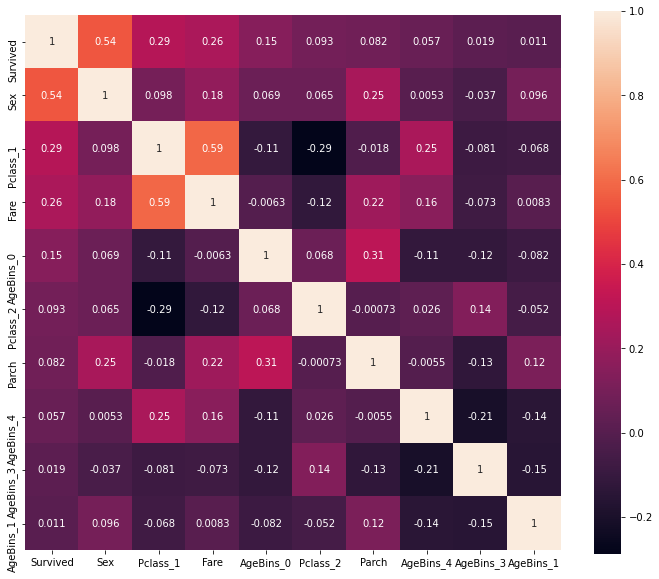

In [ ]:

correlacao = df_train.corr()
correlacao.sort_values(["Survived"], ascending = False, inplace = True)
print(correlacao.Survived.round(2))

# Plota num gráfico a importancia das variáveis
plt.figure(figsize=(12,10))
correlacao = df_train.corr()
corr_cols = correlacao.nlargest(10, 'Survived')['Survived']
sns.heatmap(df_train[corr_cols.index].corr(), annot=True, square=True)

In [ ]:
df_train.shape

(891, 17)

In [ ]:
df_train["Target"] = df_train.Survived
df_train.drop(["Survived"], axis=1, inplace=True)

In [ ]:
df_train.rename(columns={"Target": "Survived"}, inplace=True)

In [ ]:
df_train

,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3,Survived
0,0,1,0,7.25,2,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,0,71.28,1,0,0,0,0,1,0,0,0,1,0,0,1
2,1,0,0,7.92,2,0,0,0,1,0,0,0,0,0,0,1,1
3,1,1,0,53.10,2,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,0,8.05,2,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.00,2,0,0,0,1,0,0,0,0,0,1,0,0
887,1,0,0,30.00,2,0,0,1,0,0,0,0,0,1,0,0,1
888,1,1,2,23.45,2,0,0,1,0,0,0,0,0,0,0,1,0
889,0,0,0,30.00,1,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
# features [X] e label [y]

array = df_train.values

X = array[:, 0:16]
y = array[:, 16]
seed = 1234

# Calculando VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = df_train.columns[0:16]

vif.round(1)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.1,Sex
1,1.3,SibSp
2,1.4,Parch
3,1.8,Fare
4,1.1,Embarked
5,inf,AgeBins_0
6,inf,AgeBins_1
7,inf,AgeBins_2
8,inf,AgeBins_3
9,inf,AgeBins_4


ranking das features:

1. feature 0 - Sex (0.310765)
2. feature 3 - Fare (0.301701)
3. feature 15 - Pclass_3 (0.068400)
4. feature 1 - SibSp (0.061348)
5. feature 2 - Parch (0.043114)
6. feature 13 - Pclass_1 (0.042520)
7. feature 4 - Embarked (0.042217)
8. feature 5 - AgeBins_0 (0.037937)
9. feature 14 - Pclass_2 (0.017392)
10. feature 8 - AgeBins_3 (0.015061)
11. feature 7 - AgeBins_2 (0.012927)
12. feature 10 - AgeBins_5 (0.012102)
13. feature 6 - AgeBins_1 (0.010987)
14. feature 9 - AgeBins_4 (0.009601)
15. feature 12 - AgeBins_7 (0.008484)
16. feature 11 - AgeBins_6 (0.005442)


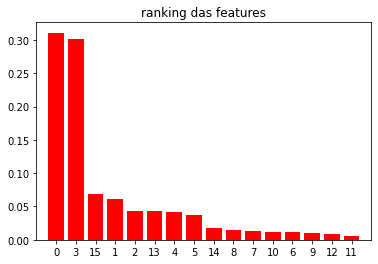

In [ ]:
# ExtraTreesClassifier

# Import dos Módulos
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier(random_state=seed)
modelo.fit(X, y)

# Imprimindo os resultados
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

print("ranking das features:")
print()
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], df_train.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("ranking das features")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
df_train.describe()

,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3,Survived
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.0,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.35,0.52,0.38,32.20,1.64,0.06,0.10,0.33,0.18,0.17,0.1,0.05,0.02,0.24,0.21,0.55,0.38
std,0.48,1.10,0.81,49.69,0.64,0.24,0.29,0.47,0.38,0.37,0.3,0.21,0.16,0.43,0.41,0.50,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,7.91,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,14.45,2.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,1.00,0.00,31.00,2.00,0.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00
max,1.00,8.00,6.00,512.33,2.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00


## MinMaxScaler

In [ ]:
# Separando o array para a transformação : 
array = df_train.values

X2 = array[:, 0:16]   # features para serem transformadas
y = array[:, 16]      # "Class"

In [ ]:
# Scaling (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

# Transformando os dados
transformer = MinMaxScaler(feature_range = (0, 1))
arr_train = transformer.fit_transform(X2)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", X2)
print("\nDados MinMaxScaler: \n\n", arr_train)

Dados Originais: 

 [[0. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 2. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Dados MinMaxScaler: 

 [[0.         0.125      0.         ... 0.         0.         1.        ]
 [1.         0.125      0.         ... 1.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         1.        ]
 ...
 [1.         0.125      0.33333333 ... 0.         0.         1.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


# Treinamento

In [ ]:
df_train.columns

Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeBins_0', 'AgeBins_1',
       'AgeBins_2', 'AgeBins_3', 'AgeBins_4', 'AgeBins_5', 'AgeBins_6',
       'AgeBins_7', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Survived'],
      dtype='object')

In [ ]:
dados_treino = pd.DataFrame()
dados_treino = pd.DataFrame({'Sex': arr_train[:, 0], 
                       'SibSp': arr_train[:, 1], 
                       'Parch': arr_train[:, 2],
                       'Fare': arr_train[:, 3], 
                       'Embarked': arr_train[:, 4], 
                       'AgeBins_0': arr_train[:, 5], 
                       'AgeBins_1': arr_train[:, 6], 
                       'AgeBins_2': arr_train[:, 7], 
                       'AgeBins_3': arr_train[:, 8], 
                       'AgeBins_4': arr_train[:, 9],
                       'AgeBins_5': arr_train[:, 10],
                       'AgeBins_6': arr_train[:, 11],
                       'AgeBins_7': arr_train[:, 12],
                       'Pclass_1': arr_train[:, 13],
                       'Pclass_2': arr_train[:, 14],
                       'Pclass_3': arr_train[:, 15],
                         'Survived': y})

In [ ]:
dados_treino.describe()

,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3,Survived
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.0,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.35,0.07,0.06,0.06,0.82,0.06,0.10,0.33,0.18,0.17,0.1,0.05,0.02,0.24,0.21,0.55,0.38
std,0.48,0.14,0.13,0.10,0.32,0.24,0.29,0.47,0.38,0.37,0.3,0.21,0.16,0.43,0.41,0.50,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.02,0.50,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,0.12,0.00,0.06,1.00,0.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00


IndexError: ignored

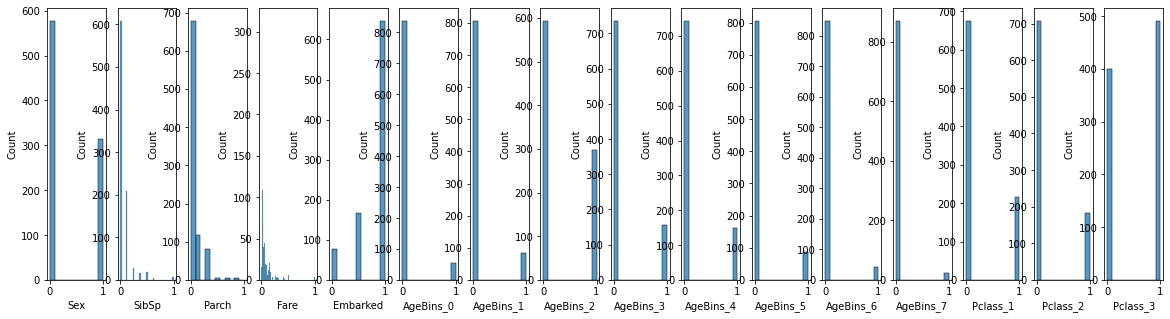

In [ ]:
fig, axs = plt.subplots(ncols=16, nrows=1, figsize=(20,5))
index = 0
axs = axs.flatten()
for k,v in dados_treino.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Separando o array para a transformação : 
array = dados_treino.values

X2 = array[:, 0:16]   # features para serem transformadas
y = array[:, 16]      # "Class"

In [ ]:
# Cross Validation

# Import dos módulos
from sklearn.model_selection import KFold

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

+ ------------------ +
| LogisticRegression |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8047 (+/- 1std 0.0227)
> precision           : 0.7775 (+/- 1std 0.0621)
> recall              : 0.6965 (+/- 1std 0.0712)
> f1                  : 0.7304 (+/- 1std 0.0346)
> balanced_accuracy   : 0.7845 (+/- 1std 0.0245)
> roc-auc             : 0.7845 (+/- 1std 0.0245)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 479.0000
> FP                  : 70.0000
> FN                  : 104.0000
> TP                  : 238.0000


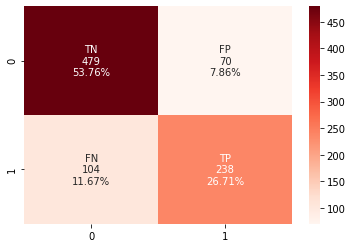

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8047
> precision           : 0.7727
> recall              : 0.6959
> f1                  : 0.7323
> sensibility         : 0.6959
> specificity         : 0.8725
> balanced_accuracy   : 0.7842

+ -------------------------- +
| LinearDiscriminantAnalysis |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8092 (+/- 1std 0.0238)
> precision           : 0.7779 (+/- 1std 0.0581)
> recall              : 0.7081 (+/- 1std 0.0862)
> f1                  : 0.7367 (+/- 1std 0.0457)
> balanced_accuracy   : 0.7906 (+/- 1std 0.0316)
> roc-auc             : 0.7906 (+/- 1std 0.0316)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 479.0000
> FP                  : 70.0000
> FN                  : 100.0000
> TP               

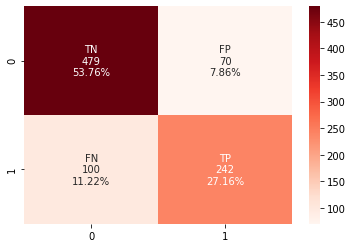

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8092
> precision           : 0.7756
> recall              : 0.7076
> f1                  : 0.7401
> sensibility         : 0.7076
> specificity         : 0.8725
> balanced_accuracy   : 0.7900

+ --- +
| SVC |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.6745 (+/- 1std 0.0325)
> precision           : 0.6835 (+/- 1std 0.0896)
> recall              : 0.2875 (+/- 1std 0.0666)
> f1                  : 0.3997 (+/- 1std 0.0674)
> balanced_accuracy   : 0.6022 (+/- 1std 0.0295)
> roc-auc             : 0.6022 (+/- 1std 0.0295)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 503.0000
> FP                  : 46.0000
> FN                  : 244.0000
> TP                  : 98.0000


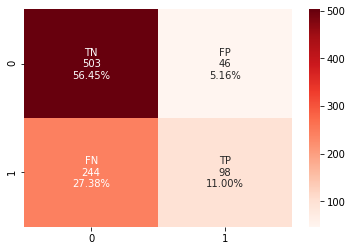

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.6745
> precision           : 0.6806
> recall              : 0.2865
> f1                  : 0.4033
> sensibility         : 0.2865
> specificity         : 0.9162
> balanced_accuracy   : 0.6014

+ ------------- +
| SGDClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.6836 (+/- 1std 0.1333)
> precision           : 0.4941 (+/- 1std 0.2769)
> recall              : 0.6745 (+/- 1std 0.3568)
> f1                  : 0.5532 (+/- 1std 0.2887)
> balanced_accuracy   : 0.6797 (+/- 1std 0.1251)
> roc-auc             : 0.6797 (+/- 1std 0.1251)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 375.0000
> FP                  : 174.0000
> FN                  : 108.0000
> TP                  : 234.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


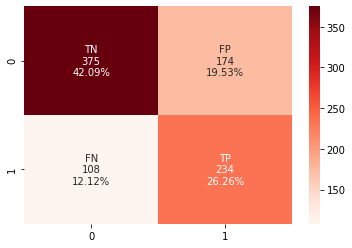

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.6835
> precision           : 0.5735
> recall              : 0.6842
> f1                  : 0.6240
> sensibility         : 0.6842
> specificity         : 0.6831
> balanced_accuracy   : 0.6836

+ -------------------- +
| KNeighborsClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.7451 (+/- 1std 0.0503)
> precision           : 0.6765 (+/- 1std 0.0808)
> recall              : 0.6534 (+/- 1std 0.0733)
> f1                  : 0.6620 (+/- 1std 0.0635)
> balanced_accuracy   : 0.7284 (+/- 1std 0.0509)
> roc-auc             : 0.7284 (+/- 1std 0.0509)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 441.0000
> FP                  : 108.0000
> FN                  : 119.0000
> TP                  : 223.00

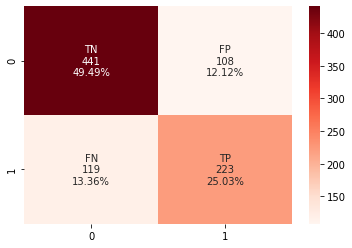

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.7452
> precision           : 0.6737
> recall              : 0.6520
> f1                  : 0.6627
> sensibility         : 0.6520
> specificity         : 0.8033
> balanced_accuracy   : 0.7277

+ ---------- +
| GaussianNB |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.7620 (+/- 1std 0.0593)
> precision           : 0.6874 (+/- 1std 0.0841)
> recall              : 0.6963 (+/- 1std 0.0946)
> f1                  : 0.6899 (+/- 1std 0.0808)
> balanced_accuracy   : 0.7498 (+/- 1std 0.0646)
> roc-auc             : 0.7498 (+/- 1std 0.0646)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 441.0000
> FP                  : 108.0000
> FN                  : 104.0000
> TP                  : 238.0000


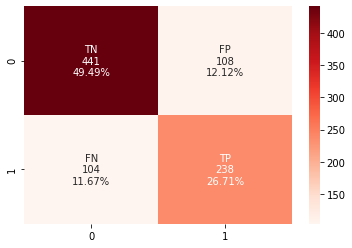

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.7621
> precision           : 0.6879
> recall              : 0.6959
> f1                  : 0.6919
> sensibility         : 0.6959
> specificity         : 0.8033
> balanced_accuracy   : 0.7496

+ ---------------------- +
| DecisionTreeClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.7878 (+/- 1std 0.0430)
> precision           : 0.7386 (+/- 1std 0.0497)
> recall              : 0.6993 (+/- 1std 0.0802)
> f1                  : 0.7155 (+/- 1std 0.0505)
> balanced_accuracy   : 0.7719 (+/- 1std 0.0442)
> roc-auc             : 0.7719 (+/- 1std 0.0442)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 464.0000
> FP                  : 85.0000
> FN                  : 104.0000
> TP                  : 238

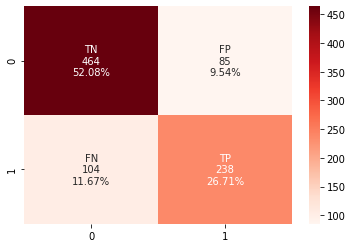

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.7879
> precision           : 0.7368
> recall              : 0.6959
> f1                  : 0.7158
> sensibility         : 0.6959
> specificity         : 0.8452
> balanced_accuracy   : 0.7705

+ ---------------------- +
| RandomForestClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8081 (+/- 1std 0.0336)
> precision           : 0.7623 (+/- 1std 0.0601)
> recall              : 0.7260 (+/- 1std 0.0829)
> f1                  : 0.7403 (+/- 1std 0.0544)
> balanced_accuracy   : 0.7920 (+/- 1std 0.0396)
> roc-auc             : 0.7920 (+/- 1std 0.0396)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 471.0000
> FP                  : 78.0000
> FN                  : 93.0000
> TP                  : 249.

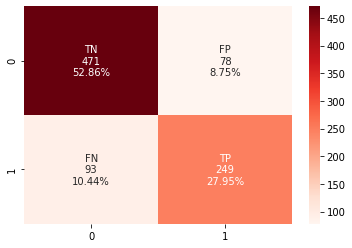

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8081
> precision           : 0.7615
> recall              : 0.7281
> f1                  : 0.7444
> sensibility         : 0.7281
> specificity         : 0.8579
> balanced_accuracy   : 0.7930

+ ------------------ +
| AdaBoostClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.8069 (+/- 1std 0.0377)
> precision           : 0.7562 (+/- 1std 0.0662)
> recall              : 0.7411 (+/- 1std 0.0857)
> f1                  : 0.7439 (+/- 1std 0.0530)
> balanced_accuracy   : 0.7953 (+/- 1std 0.0393)
> roc-auc             : 0.7953 (+/- 1std 0.0393)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 466.0000
> FP                  : 83.0000
> FN                  : 89.0000
> TP                  : 253.0000


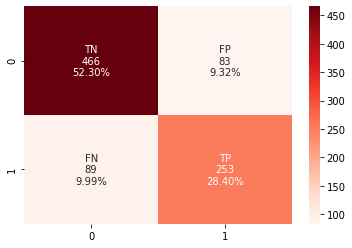

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.8070
> precision           : 0.7530
> recall              : 0.7398
> f1                  : 0.7463
> sensibility         : 0.7398
> specificity         : 0.8488
> balanced_accuracy   : 0.7943

+ ------------- +
| MLPClassifier |

Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation
> accuracy            : 0.7665 (+/- 1std 0.0514)
> precision           : 0.8028 (+/- 1std 0.1215)
> recall              : 0.5783 (+/- 1std 0.1801)
> f1                  : 0.6393 (+/- 1std 0.1183)
> balanced_accuracy   : 0.7356 (+/- 1std 0.0623)
> roc-auc             : 0.7356 (+/- 1std 0.0623)

Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate
> TN                  : 489.0000
> FP                  : 60.0000
> FN                  : 148.0000
> TP                  : 194.0000


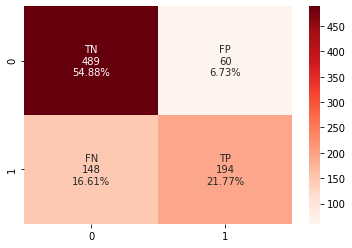

Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate
> accuracy            : 0.7666
> precision           : 0.7638
> recall              : 0.5673
> f1                  : 0.6510
> sensibility         : 0.5673
> specificity         : 0.8907
> balanced_accuracy   : 0.7290



In [ ]:
# Import dos módulos

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

# Definindo e Construindo os Scores
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def accuracy(y_true, y_pred): return accuracy_score(y_true, y_pred)
def precision(y_true, y_pred): return precision_score(y_true, y_pred)
def recall(y_true, y_pred): return recall_score(y_true, y_pred)
def f1(y_true, y_pred): return f1_score(y_true, y_pred)
def balanced_accuracy(y_true, y_pred): return balanced_accuracy_score(y_true, y_pred)
def roc_auc(y_true, y_pred): return roc_auc_score(y_true, y_pred)

scoring = {'tn' : make_scorer(tn), 'fp' : make_scorer(fp),
           'fn' : make_scorer(fn), 'tp' : make_scorer(tp), 
           'accuracy' : make_scorer(accuracy), 
           'precision' : make_scorer(precision), 
           'recall' : make_scorer(recall), 
           'f1' : make_scorer(f1), 
           'balanced_accuracy' : make_scorer(balanced_accuracy), 
           'roc_auc' : make_scorer(roc_auc), 
          }

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Preparando a lista de algoritmos
modelos = []
modelos.append(('LogisticRegression', LogisticRegression(random_state = seed, max_iter=400)))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())) # não possui o parâmetro "random_state"
modelos.append(('SVC', SVC(random_state = seed)))
modelos.append(('SGDClassifier', SGDClassifier(random_state = seed)))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier())) # não possui o parâmetro "random_state"
modelos.append(('GaussianNB', GaussianNB())) # não possui o parâmetro "random_state"
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
modelos.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
modelos.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
modelos.append(('MLPClassifier', MLPClassifier(max_iter=600, random_state = seed)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    cv_results_1 = cross_validate(modelo, X, y, scoring=scoring, cv=kfold)
    cv_results_2 = cross_val_predict(modelo, X, y, cv=kfold)
    print('+', '-'*len(nome), '+')
    print('|', nome, '|')
    print()
    print('Métricas de Avaliação : Média de cada resultado obtido em cada iteração do Cross Validation')
    print('> accuracy            : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_accuracy']), np.std(cv_results_1['test_accuracy'])))
    print('> precision           : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_precision']), np.std(cv_results_1['test_precision'])))
    print('> recall              : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_recall']), np.std(cv_results_1['test_recall'])))
    print('> f1                  : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_f1']), np.std(cv_results_1['test_f1'])))
    print('> balanced_accuracy   : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_balanced_accuracy']), np.std(cv_results_1['test_balanced_accuracy'])))
    print('> roc-auc             : %0.4f (+/- 1std %0.4f)' % (np.mean(cv_results_1['test_roc_auc']), np.std(cv_results_1['test_roc_auc'])))
    print()
    print('Matriz de Confusão    : Soma de cada resultado obtido em cada iteração do Cross Validate')
    print('> TN                  : {:0.4f}'.format(np.sum(cv_results_1['test_tn'])))
    print('> FP                  : {:0.4f}'.format(np.sum(cv_results_1['test_fp']))) 
    print('> FN                  : {:0.4f}'.format(np.sum(cv_results_1['test_fn']))) 
    print('> TP                  : {:0.4f}'.format(np.sum(cv_results_1['test_tp'])))
    c_matrix = confusion_matrix(y, cv_results_2)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Reds')
    plt.show()
    print('Métricas de Avaliação : A partir da Matriz de Confusão com a soma de cada resultado obtido em cada iteração do Cross Validate')
    TN = np.sum(cv_results_1['test_tn'])
    FP = np.sum(cv_results_1['test_fp'])
    FN = np.sum(cv_results_1['test_fn'])
    TP = np.sum(cv_results_1['test_tp'])
    accuracy = (TN+TP)/(TN+FP+FN+TP)
    print('> accuracy            : %0.4f' % accuracy)
    precision = (TP)/(TP+FP)
    print('> precision           : %0.4f' % precision)
    recall = (TP)/(TP+FN) # sensitivity, hit rate ou true positive rate (TPR)
    print('> recall              : %0.4f' % recall)
    f1 = (2*precision*recall)/(precision+recall)
    print('> f1                  : %0.4f' % f1)
    sensibility = (TP)/(TP+FN) # recall, hit rate ou true positive rate (TPR)
    print('> sensibility         : %0.4f' % sensibility)
    specificity = (TN)/(TN+FP) # selectivity ou true negative rate (TNR)
    print('> specificity         : %0.4f' % specificity)
    balanced_accuracy = (sensibility+specificity)/(2)
    print('> balanced_accuracy   : %0.4f' % balanced_accuracy)
    print()

In [ ]:
# Import dos módulos
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

# GaussianNB(priors=None, var_smoothing=1e-09)

# Definindo os valores que serão testados
valores_grid = {'criterion': ['gini','entropy'],
                'n_estimators': [1,10,25,50,100],
                'max_depth':[1,5,7,10] }

# Criando o modelo
modelo = RandomForestClassifier()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, scoring = 'f1', cv = kfold)
# Treinando o modelo
grid.fit(X, y)

# Print do resultado
print("Score:", grid.scorer_, ": %.4f" % (grid.best_score_ * 100), "%")
print()
print("Melhor configuração dos Hiperparâmetros:", grid.best_estimator_)

Score: make_scorer(f1_score, average=binary) : 75.9474 %

Melhor configuração dos Hiperparâmetros: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Criando o modelo
modelo_opt = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Treinamento do modelo otimizado em todo o dataset
modelo_opt.fit(X, y)

# Fazendo as previsões e construindo a Matriz de Confusão
y_pred_opt = modelo_opt.predict(X)
c_matrix_opt = confusion_matrix(y, y_pred_opt)

# Imprimindo a Confusion Matrix, a métrica f1 e Classification Report
print('Matriz de Confusçao :')
print(c_matrix_opt)
print()
print('f1 : %.4f' % f1_score(y, y_pred_opt))
print()
print('Classification Report : ')
print(classification_report(y, y_pred_opt))

Matriz de Confusçao :
[[534  15]
 [ 62 280]]

f1 : 0.8791

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       549
         1.0       0.95      0.82      0.88       342

    accuracy                           0.91       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.92      0.91      0.91       891



## **TRABALHANDO COM O ARQUIVO DE TESTE**




In [ ]:
nome_do_arquivo="/content/drive/MyDrive/Kaggle-Titanic/dados/test.csv"
dataframe_teste = pd.read_csv(nome_do_arquivo)

In [ ]:
dataframe_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


# Transformação de dados

In [ ]:
dataframe_teste.drop(["Cabin","Name","Ticket"], axis = 1, inplace=True)


In [ ]:
condicao = (dataframe_teste.Pclass == 1) & (dataframe_teste.Age.isna())
dataframe_teste.loc[condicao,'Age'] = 37
condicao = (dataframe_teste.Pclass == 2) & (dataframe_teste.Age.isna())
dataframe_teste.loc[condicao,'Age'] = 29
condicao = (dataframe_teste.Pclass == 3) & (dataframe_teste.Age.isna())
dataframe_teste.loc[condicao,'Age'] = 24

In [ ]:
dataframe_teste.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.83,Q
1,893,3,female,47.0,1,0,7.00,S
2,894,2,male,62.0,0,0,9.69,Q
3,895,3,male,27.0,0,0,8.66,S
4,896,3,female,22.0,1,1,12.29,S


In [ ]:
dataframe_teste.shape

(418, 8)

In [ ]:
#Creating a featrure AgeBins from Age range
#here values 1, 2, 3, 4, 5 represent Seniors, Adults, Middle Aged, Teens, Young and Childrens.
conditions = [
    (dataframe_teste['Age'] > 0) & (dataframe_teste['Age'] <= 8),
    (dataframe_teste['Age'] > 8) & (dataframe_teste['Age'] <= 18),
    (dataframe_teste['Age'] > 18) & (dataframe_teste['Age'] <= 25),
    (dataframe_teste['Age'] > 25) & (dataframe_teste['Age'] <= 32),
    (dataframe_teste['Age'] > 32) & (dataframe_teste['Age'] <= 40),
    (dataframe_teste['Age'] > 40) & (dataframe_teste['Age'] <= 50),
    (dataframe_teste['Age'] > 50) & (dataframe_teste['Age'] <= 60),
    (dataframe_teste['Age'] > 60)
    ]

values = [0, 1, 2, 3, 4, 5, 6, 7]

dataframe_teste['AgeBins'] = np.select(conditions, values)

In [ ]:
dataframe_teste.drop('Age',inplace=True, axis=1)

In [ ]:
AgeBins_dummies = pd.get_dummies(dataframe_teste['AgeBins'], 
                                       prefix='AgeBins', 
                                       prefix_sep='_', 
                                       dummy_na=False, 
                                       columns=None, 
                                       sparse=False, 
                                       drop_first=False, 
                                       dtype=None)

In [ ]:
dataframe_teste = pd.concat([dataframe_teste, AgeBins_dummies], axis = 1)
dataframe_teste.drop(["AgeBins"], axis = 1, inplace=True)

In [ ]:
dataframe_teste.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7
0,892,3,male,0,0,7.83,Q,0,0,0,0,1,0,0,0
1,893,3,female,1,0,7.00,S,0,0,0,0,0,1,0,0
2,894,2,male,0,0,9.69,Q,0,0,0,0,0,0,0,1
3,895,3,male,0,0,8.66,S,0,0,0,1,0,0,0,0
4,896,3,female,1,1,12.29,S,0,0,1,0,0,0,0,0


In [ ]:
dataframe_teste.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeBins_0      0
AgeBins_1      0
AgeBins_2      0
AgeBins_3      0
AgeBins_4      0
AgeBins_5      0
AgeBins_6      0
AgeBins_7      0
dtype: int64

In [ ]:
dataframe_teste[dataframe_teste.Fare.isna()]

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7
152,1044,3,male,0,0,NaN,S,0,0,0,0,0,0,0,1


In [ ]:
np.mean(dataframe_teste[dataframe_teste.Pclass==3]['Fare'])


12.459677880184334

In [ ]:
condicao = (dataframe_teste.Pclass==3) & (dataframe_teste.Fare.isna())
dataframe_teste.loc[condicao,'Fare'] = 12.45

In [ ]:
Pclass_dummies = pd.get_dummies(dataframe_teste['Pclass'], 
                                       prefix='Pclass', 
                                       prefix_sep='_', 
                                       dummy_na=False, 
                                       columns=None, 
                                       sparse=False, 
                                       drop_first=False, 
                                       dtype=None)

In [ ]:
Pclass_dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
df_test = pd.concat([dataframe_teste, Pclass_dummies], axis = 1)
df_test.drop(["Pclass"], axis = 1, inplace=True)


In [ ]:
df_test.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,892,male,0,0,7.83,Q,0,0,0,0,1,0,0,0,0,0,1
1,893,female,1,0,7.00,S,0,0,0,0,0,1,0,0,0,0,1
2,894,male,0,0,9.69,Q,0,0,0,0,0,0,0,1,0,1,0
3,895,male,0,0,8.66,S,0,0,0,1,0,0,0,0,0,0,1
4,896,female,1,1,12.29,S,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_test['Sex'].replace('male', 0, inplace = True)
df_test['Sex'].replace('female', 1, inplace = True) 

df_test.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,892,0,0,0,7.83,Q,0,0,0,0,1,0,0,0,0,0,1
1,893,1,1,0,7.00,S,0,0,0,0,0,1,0,0,0,0,1
2,894,0,0,0,9.69,Q,0,0,0,0,0,0,0,1,0,1,0
3,895,0,0,0,8.66,S,0,0,0,1,0,0,0,0,0,0,1
4,896,1,1,1,12.29,S,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [ ]:
df_test['SibSp'].value_counts()


0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [ ]:
df_test['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [ ]:
df_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
df_test['Embarked'].replace('Q', 0, inplace = True)
df_test['Embarked'].replace('C', 1, inplace = True) 
df_test['Embarked'].replace('S', 2, inplace = True) 


In [ ]:
df_test.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,892,0,0,0,7.83,0,0,0,0,0,1,0,0,0,0,0,1
1,893,1,1,0,7.00,2,0,0,0,0,0,1,0,0,0,0,1
2,894,0,0,0,9.69,0,0,0,0,0,0,0,0,1,0,1,0
3,895,0,0,0,8.66,2,0,0,0,1,0,0,0,0,0,0,1
4,896,1,1,1,12.29,2,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_test.isnull().sum()

PassengerId    0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeBins_0      0
AgeBins_1      0
AgeBins_2      0
AgeBins_3      0
AgeBins_4      0
AgeBins_5      0
AgeBins_6      0
AgeBins_7      0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

In [ ]:
df_test.shape

(418, 17)

In [ ]:
df_test.head()

,PassengerId,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3
0,892,0,0,0,7.83,0,0,0,0,0,1,0,0,0,0,0,1
1,893,1,1,0,7.00,2,0,0,0,0,0,1,0,0,0,0,1
2,894,0,0,0,9.69,0,0,0,0,0,0,0,0,1,0,1,0
3,895,0,0,0,8.66,2,0,0,0,1,0,0,0,0,0,0,1
4,896,1,1,1,12.29,2,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_test2 = df_test.copy()

In [ ]:
df_test2.shape

(418, 17)

In [ ]:
# features [X] e label [y]

array = df_test2.values

Z = array[:, 0]
X = array[:, 1:17]
#y = array[:, 10]
seed = 1234


## MinMaxScaler

In [ ]:
# Separando o array para a transformação : 
array = df_test2.values

X2 = array[:, 1:17]   # features para serem transformadas
# y = array[:, 9]      # "Class"

In [ ]:
# Scaling (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

# Transformando os dados
transformer = MinMaxScaler(feature_range = (0, 1))
arr_test = transformer.fit_transform(X2)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", X2)
print("\nDados MinMaxScaler: \n\n", arr_test)

Dados Originais: 

 [[0. 0. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]]

Dados MinMaxScaler: 

 [[0.         0.         0.         ... 0.         0.         1.        ]
 [1.         0.125      0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.125      0.11111111 ... 0.         0.         1.        ]]


In [ ]:
dados_teste = pd.DataFrame()
dados_teste = pd.DataFrame({'Sex': arr_test[:, 0], 
                       'SibSp': arr_test[:, 1], 
                       'Parch': arr_test[:, 2],
                       'Fare': arr_test[:, 3], 
                       'Embarked': arr_test[:, 4], 
                       'AgeBins_0': arr_test[:, 5], 
                       'AgeBins_1': arr_test[:, 6], 
                       'AgeBins_2': arr_test[:, 7], 
                       'AgeBins_3': arr_test[:, 8], 
                       'AgeBins_4': arr_test[:, 9],
                       'AgeBins_5': arr_test[:, 10],
                       'AgeBins_6': arr_test[:, 11],
                       'AgeBins_7': arr_test[:, 12],
                       'Pclass_1': arr_test[:, 13],
                       'Pclass_2': arr_test[:, 14],
                       'Pclass_3': arr_test[:, 15],
                         'PassengerId': Z})

In [ ]:
dados_teste.head()

,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3,PassengerId
0,0.0,0.00,0.00,0.02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,892.0
1,1.0,0.12,0.00,0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,893.0
2,0.0,0.00,0.00,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,894.0
3,0.0,0.00,0.00,0.02,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,895.0
4,1.0,0.12,0.11,0.02,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,896.0


In [ ]:
# Separando o array para a transformação : 
array = dados_teste.values

X2 = array[:, 0:16]   # features para serem transformadas

In [ ]:
lista = []
for indice,i in enumerate(X2):
    lista.append(int(modelo_opt.predict([i])))

dados_teste['Survived'] = lista
dados_teste['PassengerId'] = dados_teste['PassengerId'].astype(int)

In [ ]:
dados_teste[(dados_teste['Sex']==0) & (dados_teste['Pclass_3']==1)]

,Sex,SibSp,Parch,Fare,Embarked,AgeBins_0,AgeBins_1,AgeBins_2,AgeBins_3,AgeBins_4,AgeBins_5,AgeBins_6,AgeBins_7,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived
0,0.0,0.00,0.00,1.53e-02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,892,0
3,0.0,0.00,0.00,1.69e-02,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,895,0
5,0.0,0.00,0.00,1.80e-02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,897,0
9,0.0,0.25,0.00,4.71e-02,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,901,0
10,0.0,0.00,0.00,1.54e-02,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,902,0
17,0.0,0.00,0.00,1.41e-02,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,909,0
21,0.0,0.00,0.11,6.19e-03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,913,0
25,0.0,0.12,0.00,2.83e-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,917,0
27,0.0,0.00,0.00,1.41e-02,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,919,0
29,0.0,0.25,0.00,4.23e-02,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,921,0


In [ ]:
dados_teste[['PassengerId','Survived']].to_csv('/content/drive/MyDrive/Kaggle-Titanic/dados/unidos.csv', 
                                               index=False, sep=',')